Primeras 5 filas del DataFrame:
   Year  Month  DayofMonth  DayOfWeek Carrier  OriginAirportID  \
0  2013      9          16          1      DL            15304   
1  2013      9          23          1      WN            14122   
2  2013      9           7          6      AS            14747   
3  2013      7          22          1      OO            13930   
4  2013      5          16          4      DL            13931   

              OriginAirportName  OriginCity OriginState  DestAirportID  \
0           Tampa International       Tampa          FL          12478   
1      Pittsburgh International  Pittsburgh          PA          13232   
2  Seattle/Tacoma International     Seattle          WA          11278   
3  Chicago O'Hare International     Chicago          IL          11042   
4         Norfolk International     Norfolk          VA          10397   

                            DestAirportName    DestCity DestState  CRSDepTime  \
0             John F. Kennedy International  

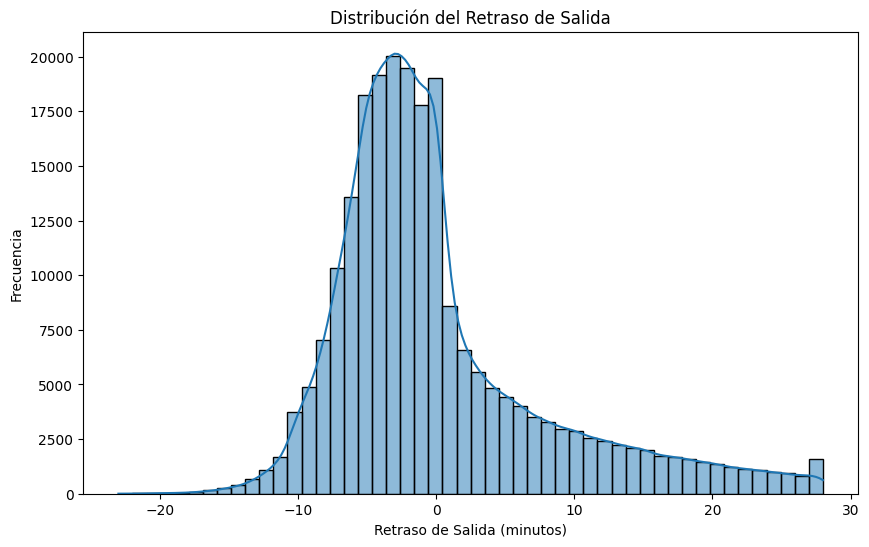

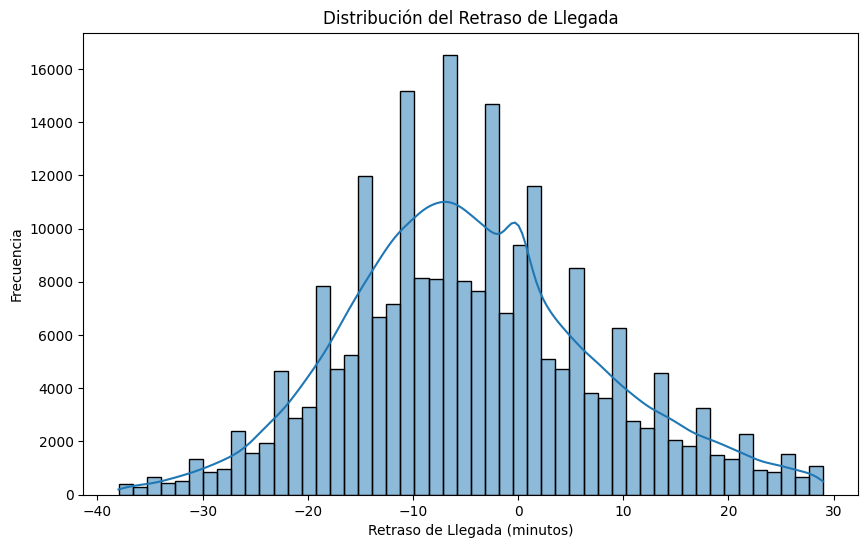


Promedio de retraso de salida: 0.22 minutos
Promedio de retraso de llegada: -4.51 minutos

Retraso de llegada promedio por aerolínea:
Carrier
9E   -7.487881
AA   -5.458915
AS   -4.281494
B6   -5.728547
DL   -6.275079
EV   -6.418824
F9   -0.097414
FL   -3.308431
HA   -2.538803
MQ   -3.755393
OO   -3.939554
UA   -7.583730
US   -3.962736
VX   -5.262368
WN   -1.274779
YV   -3.622750
Name: ArrDelay, dtype: float64

Retraso de llegada promedio por día de la semana:
DayOfWeek
1   -4.367383
2   -5.130754
3   -4.292989
4   -3.257212
5   -3.807781
6   -5.909817
7   -4.996028
Name: ArrDelay, dtype: float64

Aeropuerto de salida con mayor retraso promedio:
OriginAirportName
Chicago Midway International    4.766591
Name: DepDelay, dtype: float64


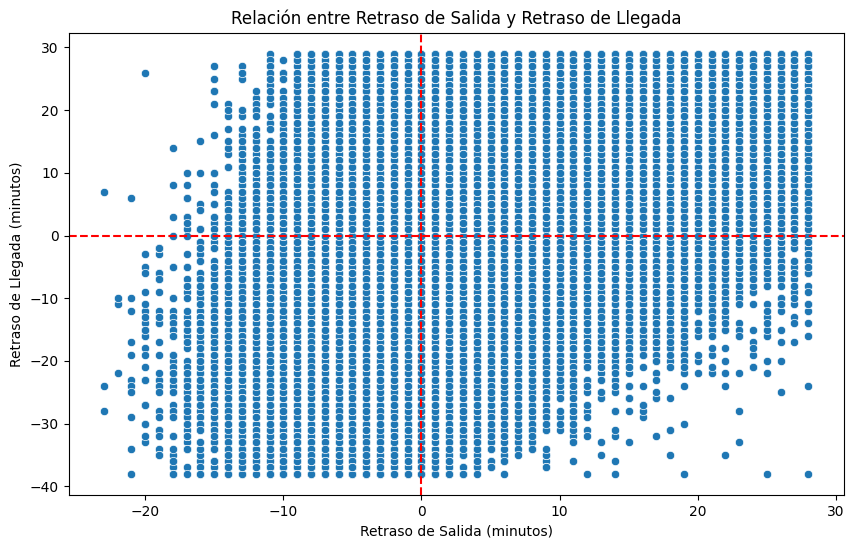


Ruta con más llegadas tardías:
OriginAirportName            DestAirportName          
San Francisco International  Los Angeles International    269
dtype: int64

Ruta con mayor retraso promedio en llegadas:
OriginAirportName                          DestAirportName                  
Louis Armstrong New Orleans International  Ronald Reagan Washington National    25.333333
Name: ArrDelay, dtype: float64


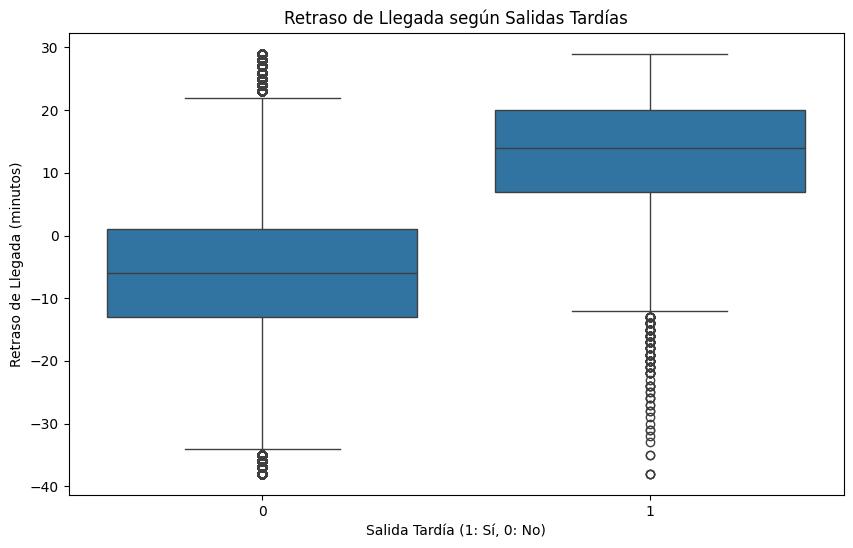

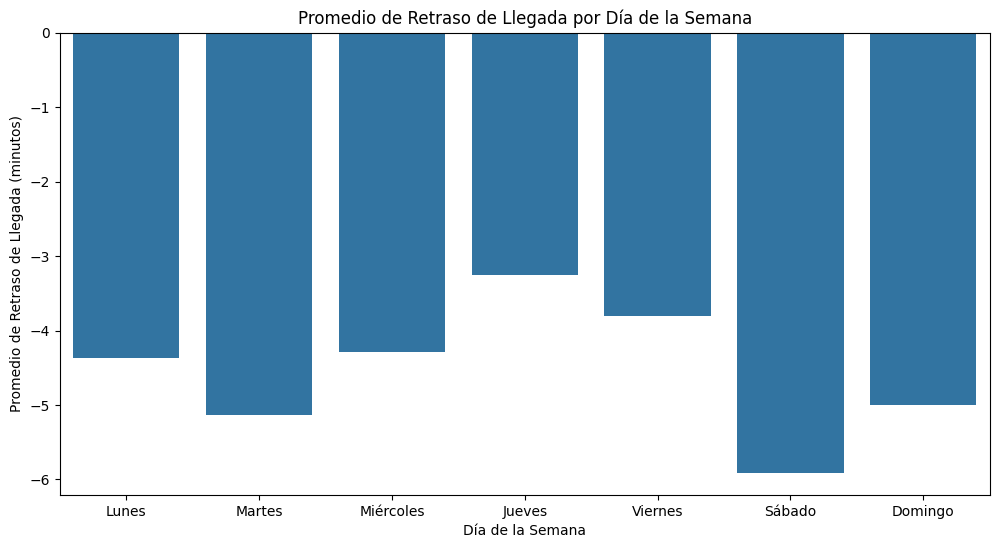

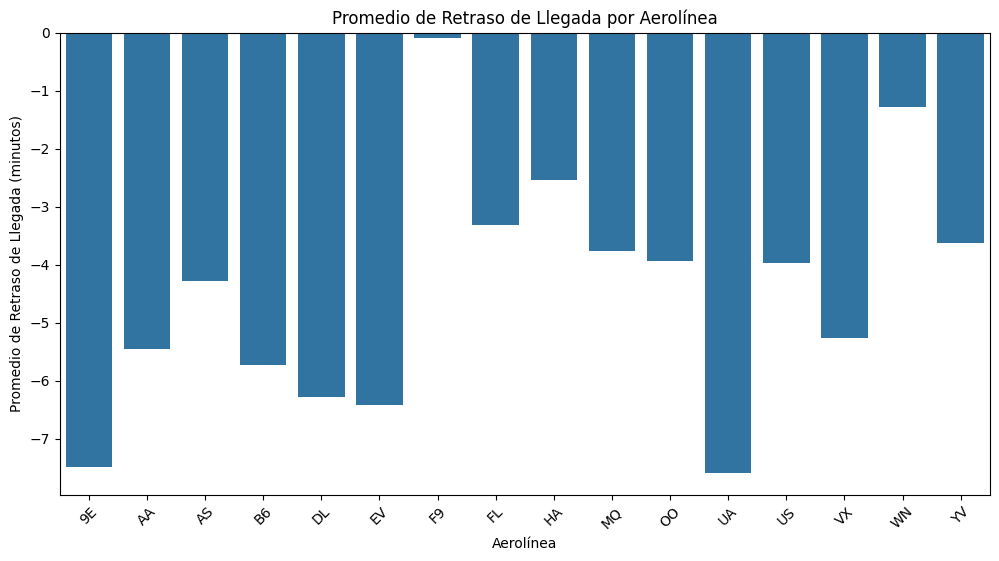


Conclusiones finales:
1. La media de retraso de salida es de 0.22 minutos y la de llegada es de -4.51 minutos.
2. Las aerolíneas con mayores retrasos promedio son:
Carrier
F9   -0.097414
WN   -1.274779
HA   -2.538803
FL   -3.308431
YV   -3.622750
Name: ArrDelay, dtype: float64
3. Los días de la semana con mayores retrasos de llegada son:
DayOfWeek
4   -3.257212
5   -3.807781
3   -4.292989
1   -4.367383
7   -4.996028
Name: ArrDelay, dtype: float64
4. El aeropuerto con mayor retraso promedio es: Chicago Midway International
5. La ruta con más llegadas tardías es: OriginAirportName            DestAirportName          
San Francisco International  Los Angeles International    269
dtype: int64
6. La ruta con mayor retraso promedio en llegadas es: OriginAirportName                          DestAirportName                  
Louis Armstrong New Orleans International  Ronald Reagan Washington National    25.333333
Name: ArrDelay, dtype: float64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
df_flights = pd.read_csv('D:/UCQ/7to Cuatri/Vanguardia/Examen1erParcial/flights.csv')

# Mostrar las primeras filas del DataFrame
print("Primeras 5 filas del DataFrame:")
print(df_flights.head())

# Identificar valores nulos
print("\nValores nulos en el DataFrame:")
print(df_flights.isnull().sum())

# Imputar valores nulos en DepDelay y ArrDelay con la media
df_flights['DepDelay'] = df_flights['DepDelay'].fillna(df_flights['DepDelay'].mean())
df_flights['ArrDelay'] = df_flights['ArrDelay'].fillna(df_flights['ArrDelay'].mean())

# Verificar que no hay valores nulos
print("\nValores nulos después de la imputación:")
print(df_flights.isnull().sum())

# Calcular el IQR para DepDelay
Q1 = df_flights['DepDelay'].quantile(0.25)
Q3 = df_flights['DepDelay'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los outliers en DepDelay
df_flights = df_flights[~((df_flights['DepDelay'] < (Q1 - 1.5 * IQR)) | (df_flights['DepDelay'] > (Q3 + 1.5 * IQR)))]

# Calcular el IQR para ArrDelay
Q1 = df_flights['ArrDelay'].quantile(0.25)
Q3 = df_flights['ArrDelay'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los outliers en ArrDelay
df_flights = df_flights[~((df_flights['ArrDelay'] < (Q1 - 1.5 * IQR)) | (df_flights['ArrDelay'] > (Q3 + 1.5 * IQR)))]

# Ver estadísticas resumen de las columnas numéricas
print("\nEstadísticas resumen del DataFrame:")
print(df_flights.describe())

# Visualizar la distribución de DepDelay
plt.figure(figsize=(10, 6))
sns.histplot(df_flights['DepDelay'], bins=50, kde=True)
plt.title('Distribución del Retraso de Salida')
plt.xlabel('Retraso de Salida (minutos)')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución de ArrDelay
plt.figure(figsize=(10, 6))
sns.histplot(df_flights['ArrDelay'], bins=50, kde=True)
plt.title('Distribución del Retraso de Llegada')
plt.xlabel('Retraso de Llegada (minutos)')
plt.ylabel('Frecuencia')
plt.show()

# Calcular los promedios de retraso
avg_dep_delay = df_flights['DepDelay'].mean()
avg_arr_delay = df_flights['ArrDelay'].mean()
print(f"\nPromedio de retraso de salida: {avg_dep_delay:.2f} minutos")
print(f"Promedio de retraso de llegada: {avg_arr_delay:.2f} minutos")

# Comparar el rendimiento en retrasos de llegada por aerolínea
avg_arr_delay_per_carrier = df_flights.groupby('Carrier')['ArrDelay'].mean()
print("\nRetraso de llegada promedio por aerolínea:")
print(avg_arr_delay_per_carrier)

# Comparar los retrasos de llegada por día de la semana
avg_arr_delay_per_day = df_flights.groupby('DayOfWeek')['ArrDelay'].mean()
print("\nRetraso de llegada promedio por día de la semana:")
print(avg_arr_delay_per_day)

# Calcular el aeropuerto de salida con el mayor retraso promedio
avg_dep_delay_per_airport = df_flights.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending=False)
print("\nAeropuerto de salida con mayor retraso promedio:")
print(avg_dep_delay_per_airport.head(1))

# Relación entre retrasos de salida y llegada
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DepDelay', y='ArrDelay', data=df_flights)
plt.title('Relación entre Retraso de Salida y Retraso de Llegada')
plt.xlabel('Retraso de Salida (minutos)')
plt.ylabel('Retraso de Llegada (minutos)')
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.show()

# Calcular la ruta con más llegadas tardías
late_arrivals = df_flights[df_flights['ArrDelay'] > 0]
most_late_arrivals_route = late_arrivals.groupby(['OriginAirportName', 'DestAirportName']).size().sort_values(ascending=False).head(1)
print("\nRuta con más llegadas tardías:")
print(most_late_arrivals_route)

# Calcular la ruta con mayor retraso promedio en llegadas
avg_arr_delay_per_route = df_flights.groupby(['OriginAirportName', 'DestAirportName'])['ArrDelay'].mean().sort_values(ascending=False)
print("\nRuta con mayor retraso promedio en llegadas:")
print(avg_arr_delay_per_route.head(1))

# Análisis adicional
# 1. Crear la columna DelDelay15
df_flights['DelDelay15'] = (df_flights['DepDelay'] > 15).astype(int)

# 1. ¿Las salidas tardías tienden a resultar en retrasos de llegada más largos?
plt.figure(figsize=(10, 6))
sns.boxplot(x='DelDelay15', y='ArrDelay', data=df_flights)
plt.title('Retraso de Llegada según Salidas Tardías')
plt.xlabel('Salida Tardía (1: Sí, 0: No)')
plt.ylabel('Retraso de Llegada (minutos)')
plt.show()

# 2. Visualizar la relación de los retrasos según el día de la semana
plt.figure(figsize=(12, 6))
sns.barplot(x='DayOfWeek', y='ArrDelay', data=df_flights, estimator='mean', errorbar=None)
plt.title('Promedio de Retraso de Llegada por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Promedio de Retraso de Llegada (minutos)')
plt.xticks(ticks=range(7), labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.show()

# 3. Comparar el promedio de retraso de llegada entre aerolíneas usando un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_arr_delay_per_carrier.index, y=avg_arr_delay_per_carrier.values)
plt.title('Promedio de Retraso de Llegada por Aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Promedio de Retraso de Llegada (minutos)')
plt.xticks(rotation=45)
plt.show()

# Conclusiones finales
print("\nConclusiones finales:")
print("1. La media de retraso de salida es de {:.2f} minutos y la de llegada es de {:.2f} minutos.".format(avg_dep_delay, avg_arr_delay))
print("2. Las aerolíneas con mayores retrasos promedio son:")
print(avg_arr_delay_per_carrier.sort_values(ascending=False).head())
print("3. Los días de la semana con mayores retrasos de llegada son:")
print(avg_arr_delay_per_day.sort_values(ascending=False).head())
print("4. El aeropuerto con mayor retraso promedio es:", avg_dep_delay_per_airport.head(1).index[0])
print("5. La ruta con más llegadas tardías es:", most_late_arrivals_route)
print("6. La ruta con mayor retraso promedio en llegadas es:", avg_arr_delay_per_route.head(1))